# ANN Model

In [1]:
# import required libraries
import numpy as np
import pandas as pd


In [2]:
# load the dataset
df = pd.read_csv('data.csv')
df.shape

(569, 33)

In [5]:
# explore the dataset
print(df.columns.tolist())
print(df.isnull().sum())

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se       

In [6]:
# we will drop the 'unnamed:32' column as it has all the values as NaN
df = df.drop('Unnamed: 32', axis=1)

In [8]:
print(df.isnull().sum())
print(df.shape)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
(569, 32)


In [9]:
# now we will se a sample of the dataset
print(df.sample(5))

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
194  87556202         M        14.86         23.21          100.40      671.4   
324  89511501         B        12.20         15.21           78.01      457.9   
472    911384         B        14.92         14.93           96.45      686.9   
499     91485         M        20.59         21.24          137.80     1320.0   
232  88203002         B        11.22         33.81           70.79      386.8   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
194          0.10440           0.19800        0.169700             0.088780   
324          0.08673           0.06545        0.019940             0.016920   
472          0.08098           0.08549        0.055390             0.032210   
499          0.10850           0.16440        0.218800             0.112100   
232          0.07780           0.03574        0.004967             0.006434   

     ...  radius_worst  texture_worst 

In [10]:
# find the no. of unique 'diagnosis' values
print(df['diagnosis'].unique())

['M' 'B']


In [11]:
# convert the categorical data into numerical data
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [12]:
print(df.sample(5))

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
228  88147202          0        12.62         23.97           81.35   
164   8712289          1        23.27         22.04          152.10   
172     87164          1        15.46         11.89          102.50   
93     862009          0        13.45         18.30           86.60   
296    891936          0        10.91         12.35           69.14   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
228      496.4          0.07903           0.07529         0.05438   
164     1686.0          0.08439           0.11450         0.13240   
172      736.9          0.12570           0.15550         0.20320   
93       555.1          0.10220           0.08165         0.03974   
296      363.7          0.08518           0.04721         0.01236   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
228              0.02036  ...         14.20          31.31            90.67   


In [13]:
# split the dataset into features and labels
df_features = df.drop('diagnosis', axis=1)
df_label = df['diagnosis']


In [14]:
print(df_features.shape)
print(df_label.shape)

(569, 31)
(569,)


In [36]:
# split the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.2, random_state=42)

In [37]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Now we will define the ANN architecture
import keras
from keras.models import Sequential
from keras.layers import Dense
# there will be input layer which takes 31 input features, one hidden layer with 15 neurons and one output layer with 1 neuron
classifier = Sequential()
classifier.add(Dense(units=15, kernel_initializer='uniform', activation='sigmoid', input_dim=31))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# use gradient descent for optimzation and mean squared error as loss function
classifier.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
# train the model with 100 epochs and use whole dataset for each epoch
train_hist = classifier.fit(X_train, y_train, batch_size=len(X_train), epochs=100, validation_split=0.1)


Epoch 1/100
1/1 [==============================] - 1s 622ms/step - loss: 0.2514 - accuracy: 0.3790 - val_loss: 0.2521 - val_accuracy: 0.3043
Epoch 2/100
1/1 [==============================] - 0s 112ms/step - loss: 0.2512 - accuracy: 0.3790 - val_loss: 0.2518 - val_accuracy: 0.3043
Epoch 3/100
1/1 [==============================] - 0s 68ms/step - loss: 0.2510 - accuracy: 0.3790 - val_loss: 0.2515 - val_accuracy: 0.3043
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2508 - accuracy: 0.3790 - val_loss: 0.2512 - val_accuracy: 0.3043
Epoch 5/100
1/1 [==============================] - 0s 54ms/step - loss: 0.2506 - accuracy: 0.3790 - val_loss: 0.2509 - val_accuracy: 0.3043
Epoch 6/100
1/1 [==============================] - 0s 55ms/step - loss: 0.2504 - accuracy: 0.3790 - val_loss: 0.2506 - val_accuracy: 0.3043
Epoch 7/100
1/1 [==============================] - 0s 55ms/step - loss: 0.2502 - accuracy: 0.3814 - val_loss: 0.2503 - val_accuracy: 0.3261
Epoch 8/100
1/1 [=

In [39]:
# evaluate on test data and present the results
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# predict on test data
y_pred_prob = classifier.predict(X_test)
# Convert probabilities to binary classes using a threshold
y_pred = (y_pred_prob > 0.5).astype(int)  # Use 0.5 as threshold for binary classification
# Calculate accuracy
accuracy = np.mean(y_pred.ravel() == y_test.ravel())  # assuming y_test contains true labels
# Print accuracy
print("Accuracy:", accuracy)


4/4 [==============================] - 0s 1ms/step
Accuracy: 0.6228070175438597


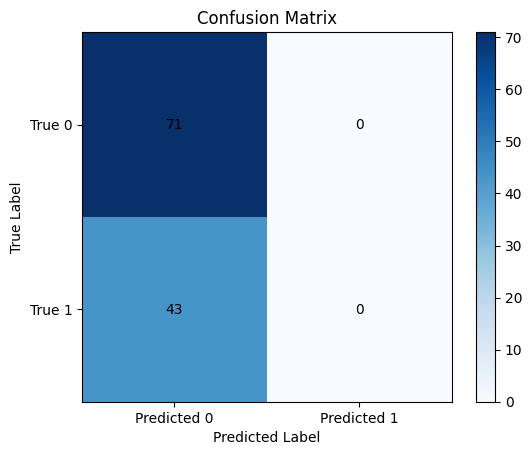

In [43]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix")
plt.xticks(ticks=[0, 1], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0, 1], labels=['True 0', 'True 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add count of predictions in each category to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')

plt.show()

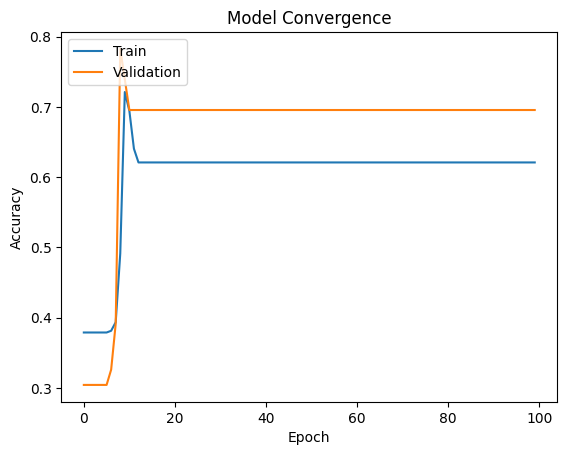

In [44]:
# convergence plot
import matplotlib.pyplot as plt
plt.plot(train_hist.history['accuracy'])
plt.plot(train_hist.history['val_accuracy'])
plt.title('Model Convergence')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

KNN can also be used to build a classifier for the above problem.
For KNN, we can use k=3 and the distance metric can be Euclidean distance.

# KNN Model

In [45]:
# import the requrired libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
# define the model
k = 3 # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

In [47]:
# now train and fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [48]:
# now predict labels for test data and evaluate the model
y_pred = knn.predict(X_test)

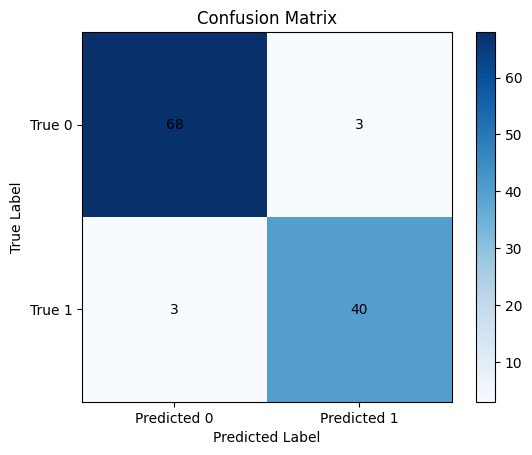

In [49]:
# display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix")
plt.xticks(ticks=[0, 1], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0, 1], labels=['True 0', 'True 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add count of predictions in each category to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')

plt.show()

In [50]:
# other evaluation metrices
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1-score: 0.9302325581395349


# Comparison of ANN and KNN

From the evaluation results of the ANN and KNN, we can see that the KNN model has better accuracy than the ANN model.

Also, we can see in the confusion matrices that in KNN more no. of predictions are on diagonal than in the ANN model, which means that the KNN model is better at predicting the classes because diagonal elements in the confusion matrix represent the correct predictions.

But, this doesn't mean that ANN technique is bad for solving this problem. It's just that the ANN model and architecture which we have defined didn't worked well here. We can fine tune the ANN model and architecture to get better results.